题目： 画出你最爱的折线

**题目要求**：

本练习继续使用某电商超市从2016年到2019年的部分销售数据，路径为：`./data/Commerce.xls`。

请用一张图绘制出2018年各地区销售总额及增长率。如下图：

![](../assets/3.png)



In [ ]:
2018年各地区的销售总额     地区   销售额(年份)
1.读取数据
2.将时间(订单日期)设置为数据的索引
3.根据设置完索引的数据按照地区进行分组，并统计出销售额
4.计算增长率
5.绘图

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_excel('../data/Commerce.xls')
data.head()

,行 ID,订单 ID,订单日期,邮寄方式,客户 ID,客户名称,细分,城市,省/自治区,国家,地区,产品 ID,类别,子类别,产品名称,销售额,数量,折扣,利润
0,1,US-2019-1357144,2019-04-27,二级,曾惠-14485,曾惠,公司,杭州,浙江,中国,华东,办公用-用品-10002717,办公用品,用品,"Fiskars 剪刀, 蓝色",163.696,10,0.37,-60.704
1,2,CN-2019-1973789,2019-06-15,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-信封-10004832,办公用品,信封,"GlobeWeis 搭扣信封, 红色",159.440,10,0.00,42.560
2,3,CN-2019-1973789,2019-06-15,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-装订-10001505,办公用品,装订机,"Cardinal 孔加固材料, 回收",65.920,10,0.37,4.200
3,5,CN-2018-2975416,2018-05-31,二级,万兰-15730,万兰,消费者,汕头,广东,中国,中南,办公用-器具-10003452,办公用品,器具,"KitchenAid 搅拌机, 黑色",1409.920,11,0.00,550.200
4,6,CN-2017-4497736,2017-10-27,标准级,俞明-18325,俞明,消费者,景德镇,江西,中国,华东,技术-设备-10001640,技术,设备,"柯尼卡 打印机, 红色",11163.580,17,0.00,3783.780


In [4]:
# 将订单日期设置为数据的行索引
data.index = data['订单日期']

In [8]:
# 2018年各季度地区的销售额
# area_sales18 = data
data['2018'].groupby('地区').size()

地区
东北    445
中南    651
华东    801
华北    382
西北    125
西南    250
dtype: int64

In [9]:
# 2018年各季度地区的销售额
# area_sales18 = data
data['2018'].groupby('地区').groups

{'东北': DatetimeIndex(['2018-12-24', '2018-12-31', '2018-12-31', '2018-12-31',
                '2018-03-11', '2018-11-04', '2018-10-30', '2018-02-01',
                '2018-03-04', '2018-03-04',
                ...
                '2018-03-15', '2018-03-15', '2018-03-15', '2018-02-15',
                '2018-02-15', '2018-06-05', '2018-06-05', '2018-06-05',
                '2018-12-16', '2018-12-24'],
               dtype='datetime64[ns]', name='订单日期', length=445, freq=None),
 '中南': DatetimeIndex(['2018-05-31', '2018-10-01', '2018-06-07', '2018-02-27',
                '2018-09-18', '2018-09-18', '2018-11-29', '2018-11-29',
                '2018-10-26', '2018-10-26',
                ...
                '2018-11-14', '2018-11-14', '2018-06-27', '2018-06-18',
                '2018-06-18', '2018-06-18', '2018-06-18', '2018-06-18',
                '2018-12-02', '2018-10-03'],
               dtype='datetime64[ns]', name='订单日期', length=651, freq=None),
 '华东': DatetimeIndex(['2018-11-22', '2018-

In [16]:
# 2018年各季度地区的总销售额
# area_sales18 = data
data['2018'].groupby('地区')['销售额'].sum()

地区
东北     769801.750
中南     994035.777
华东    1362444.842
华北     615170.959
西北     205343.676
西南     386978.856
Name: 销售额, dtype: float64

In [17]:
# 2018年各季度地区的总销售额
area_sales18 = data['2018'].groupby('地区')['销售额'].sum()
# data['2018'].groupby('地区')['销售额'].sum()

In [18]:
# 201年各季度地区的总销售额
area_sales17 = data['2017'].groupby('地区')['销售额'].sum()

In [ ]:
# 将订单日期设置为数据的索引
data.index = data['订单日期']

# 2018年各季度各地区的总销售额
area_sales18 = data['2018'].groupby('地区')['销售额'].sum()

# 2017年各季度各地区的总销售额
area_sales17 = data['2017'].groupby('地区')['销售额'].sum()

# 增长率 = (area_sales18- area_sales17)/area_sales17
growth_rate = (area_sales18-area_sales17)/area_sales17

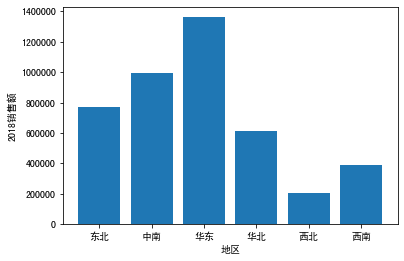

In [22]:
# 绘图
fig = plt.figure()
ax = fig.add_subplot(111)

lin1 = ax.bar(area_sales18.index.tolist(),area_sales18.values.tolist())

ax.set_ylabel("2018销售额")
ax.set_xlabel("地区")

plt.xticks(growth_rate.index)

plt.show()

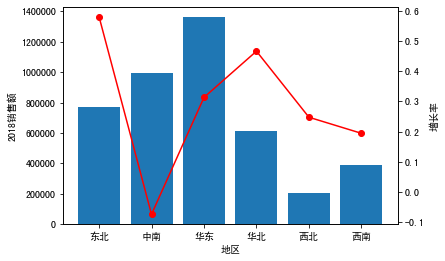

In [26]:
# 绘图
fig = plt.figure()
ax = fig.add_subplot(111)

lin1 = ax.bar(area_sales18.index.tolist(),area_sales18.values.tolist())

ax.set_ylabel("2018销售额")
ax.set_xlabel("地区")
plt.xticks(growth_rate.index)

ax2 = ax.twinx()
lin2 = ax2.plot(growth_rate.index,growth_rate.values,color='red',marker='o')
ax2.set_ylabel('增长率')

plt.show()

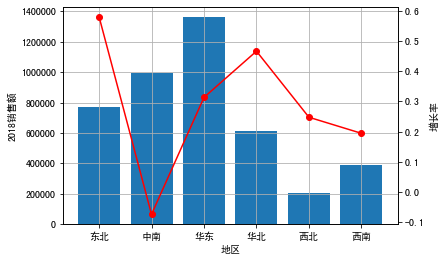

In [27]:
# 绘图
fig = plt.figure()
ax = fig.add_subplot(111)

lin1 = ax.bar(area_sales18.index.tolist(),area_sales18.values.tolist())

ax.set_ylabel("2018销售额")
ax.set_xlabel("地区")
plt.xticks(growth_rate.index)

ax2 = ax.twinx()
lin2 = ax2.plot(growth_rate.index,growth_rate.values,color='red',marker='o')
ax2.set_ylabel('增长率')

# 绘制
ax.grid()

plt.show()